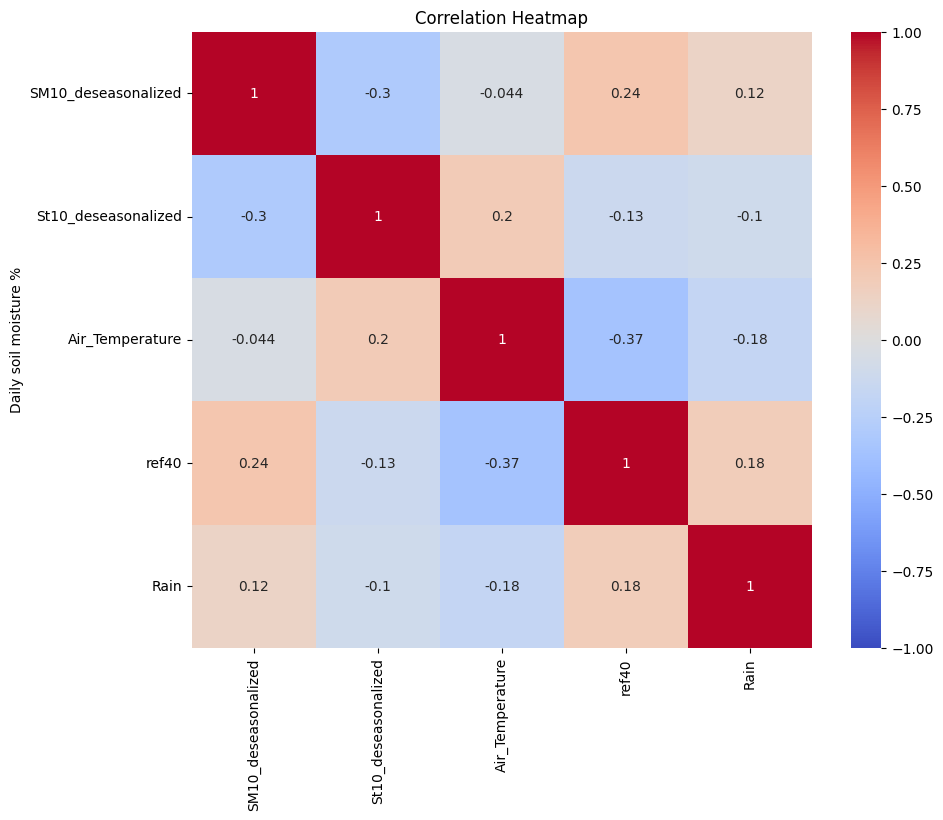

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('SM2_Data.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data.set_index('Date', inplace=True)

data['DayOfYear'] = data.index.dayofyear

mean_sm10 = data.groupby('DayOfYear')['SM10'].mean()
mean_st10 = data.groupby('DayOfYear')['St10'].mean()

data['SM10_deseasonalized'] = data['SM10'] - data['DayOfYear'].map(mean_sm10)
data['St10_deseasonalized'] = data['St10'] - data['DayOfYear'].map(mean_st10)

data.drop(columns='DayOfYear', inplace=True)

correlation_matrix = data[['SM10_deseasonalized', 'St10_deseasonalized', 'Air_Temperature', 'ref40', 'Rain']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.ylabel('Daily soil moisture %')
plt.show()
